In [1]:
include("../modules/IVTmodel.jl")

LoadError: LoadError: ArgumentError: Package DifferentialEquations not found in current path.
- Run `import Pkg; Pkg.add("DifferentialEquations")` to install the DifferentialEquations package.
in expression starting at C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\modules\IVTmodel.jl:2

In [2]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,osumidata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics
Precompiling Metrics
        Info Given Metrics was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Metrics
[ Info: Precompiling Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78].
┌ Warning: Replacing docs for `Metrics.bin_to_cat :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metrics.confusion_matrix :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metri

Model has 24 fitted parameters, 16 of which have a bayesian prior
Total Residual:                        1115.7
Components of residual:
Concentration Trajectories (Figure 2): 455.1
Initial Reaction Rate (Figure 3A):     200.1
Mg2PPi solubility (Figure 3B):         221.0
Parameter priors:                      152.9
pH Effect Data:                        86.5


In [14]:
akamafittedparams

ComponentVector{Float64}(k_dT7 = 0.0, k_i = 10033.932269288214, k_i_guo = 4077.902799784149, k_e = 144740.69402528013, k_e_guo = 700354.4760052838, k_off = 4320.0, k_on = 655.5499964892632, K_1 = 0.00022939127604081495, K_2 = 8.402425576273429e-8, nMg = 25.000000000000007, Ki_PPi = 3.978258975190659e-5, K_Mg = 42.277291171387716, K_u0 = 13.972734138436664, K_a = 6.31592770006816e-8, K_b = 3.5859071525322855e-10, k_pH = 12.049038794342062, gamma = 1.0, theta = 0.0208, K_ds = 1.0, kPPiase = 1.0, KMPPiase = 0.000214, k_precip = 4.381390155402364, B = 43.124026035409756, k_d = 40237.06270928633, K_HNTP = 3.0669027151623075e6, K_HMgNTP = 101.93421904967055, K_HPPi = 1.0471285480508986e9, K_HMgPPi = 1297.1723676838908, K_H2PPi = 1.8197008586099825e6, K_H2MgPPi = 128.82495516931337, K_MgNTP = 7142.8858319953115, K_Mg2NTP = 40.26243159764699, K_MgPPi = 104785.64652453465, K_Mg2PPi = 5087.772719974956, Mg2PPi_eq = 0.00012858206494165006, K_MgPi = 43.19592714369777, K_HPi = 4.171987514076607e6, 

In [3]:
#First, we are going to generate a new modeling framework where we fix the fitted akama parameters, and only allow two to vary for fitting: k_i and k_e
SP6fittingparameters = [Parameter("k_i",936,1,50000),Parameter("k_e",5.3e5,1e4,15e5)]
SP6fittingmodel = fixparameters(fittingmodel,akamafittedparameterslist,resetparameters = SP6fittingparameters)
bulkSP6filename = "../data/external/mccalla/mccalla08.csv"
bulkSP6residualfunction = (model,_,x) -> customresidual(model,bulkSP6filename,x)
optim=localopt(SP6fittingmodel,[],300,log10.([936,5.3e5]),bulkSP6residualfunction,verbose = true)
SP6bulkfittedparamslist = optim[4]
SP6bulkfittedparams = fullparameterset(SP6fittingmodel,SP6bulkfittedparamslist)
SP6bulkcovariancemat = getcovariancematrix(SP6fittingmodel,[],osumidata,SP6bulkfittedparamslist,customfile = true,customfilename = bulkSP6filename, includeakama = false);

41.88311433957842
372.00132686491156
36.509156195829796
18.606904825535548
14.541432137420756
13.652781830211595
13.599332493040812
13.597095704214262
13.592738950333239
13.57833551986933
13.533547337750537
12.099948277483994
68.34411924684717
1.0452274803118544
210.15118084826395
0.5541960024360564
0.40973808862629113
0.4040967478017037
0.40407132905584714
0.40407111567902787
0.4040711171165008
0.4040711157578318
0.4040711156784284
got 0.4040711156784284 at [686.790128601607, 38808.42832956782] after 23 iterations (returned FTOL_REACHED)


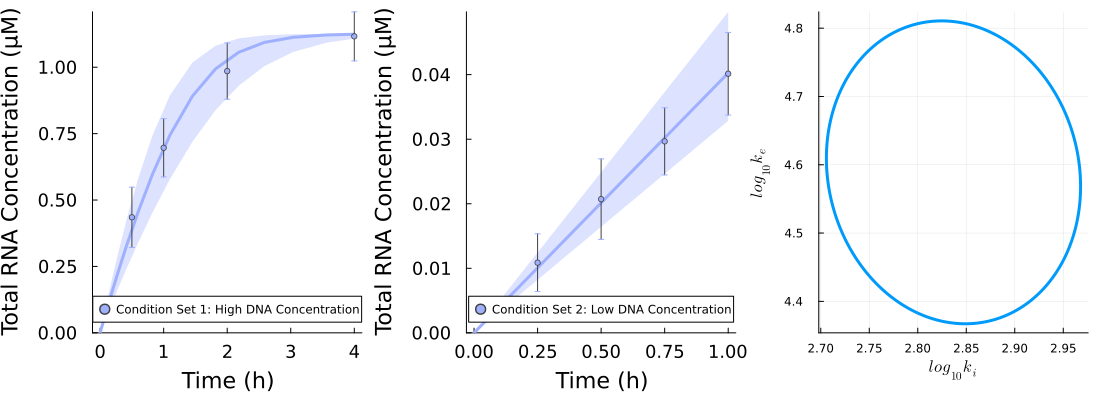

In [4]:
#Now we plot against the bulk SP6 Polymerase Data
SP6bulkplot1 = plotfromcsv(SP6fittingmodel,SP6bulkfittedparamslist,SP6bulkcovariancemat,bulkSP6filename, labels = ["Condition Set 1: High DNA Concentration"], range = 1:1,dataerrorbars = true, plotsize = (500,400), multiplot = false,maximumyield = false)
Sp6bulkplot2 = plotfromcsv(SP6fittingmodel,SP6bulkfittedparamslist,SP6bulkcovariancemat,bulkSP6filename, labels = ["Condition Set 2: Low DNA Concentration"], range = 2:2,dataerrorbars = true, plotsize = (500,400), multiplot = false,maximumyield = false)
ellipseplot = plotparametricellipseprojection(SP6bulkfittedparamslist,SP6bulkcovariancemat,labels = [L"log_{10}k_i",L"log_{10}k_e"])
plt = plot(SP6bulkplot1,Sp6bulkplot2,ellipseplot,layout = (1,3),size = (1100,400),leftmargin = 5mm, bottommargin = 8mm, legend = :bottom)
savefig(plt,"../figures/SP6bulk.png")
plt

In [5]:
#Next, we are going to fix all parameters and add a parameter representing the relative DNA factor. 
SP6immobilizedfilename = "../data/external/mccalla/mccalla10_NTPandPolymerase.csv"
#SP6immobilizedfittingmodel = fixparameters(SP6fittingmodel,SP6bulkfittedparamslist,resetparameters = [Parameter("k_i",936,1,50000),Parameter("k_on",204,0.1,2e5)]);immobilizedSP6residualfunction = (model,_,x) -> customresidual(model,SP6immobilizedfilename,x,immobilized = true)
#SP6immobilizedfittingmodel = fixparameters(SP6fittingmodel,SP6bulkfittedparamslist,resetparameters = [Parameter("k_on",204,0.1,2e5)])
SP6immobilizedfittingmodel = fixparameters(SP6fittingmodel,SP6bulkfittedparamslist,resetparameters = [Parameter("k_on",204,0.1,2e5), Parameter("K_1",10^(-3.692),1e-9,1e-1)])
immobilizedSP6residualfunction = (model,_,x) -> customresidual(model,SP6immobilizedfilename,x,immobilized = true, OAccounterion = false)

optim=localopt(SP6immobilizedfittingmodel,[],300,log10.([204, 10^(-3.692)]),immobilizedSP6residualfunction,verbose = true)
SP6immobilizedfittedparamslist = optim[4]
SP6immobilizedfittedparams = fullparameterset(SP6immobilizedfittingmodel,SP6immobilizedfittedparamslist)
SP6immobilizedcovariancemat = getcovariancematrix(SP6immobilizedfittingmodel,[],osumidata,SP6immobilizedfittedparamslist,customfile = true,customfilename = SP6immobilizedfilename, includeakama = false,immobilized = true, OAccounterion = false);

13478.490938247083
270.4602551986446
270.1927568737797
269.359086304803
265.51141525818883
238.46355293304387
131.82386864284982
267.0092650074113
45.62017392584425
27.362911960991298
23.56412461387349
21.81902696154821
21.774843405587017
21.773779355622775
21.771824535280274
21.766091081217528
21.753483343910926
21.729357794793735
21.713212440231977
21.71156568900599
21.710906702219866
21.71090415294921
21.710904150746646
got 21.710904150746646 at [62.15329435447404, 0.011176066449826825] after 23 iterations (returned FTOL_REACHED)


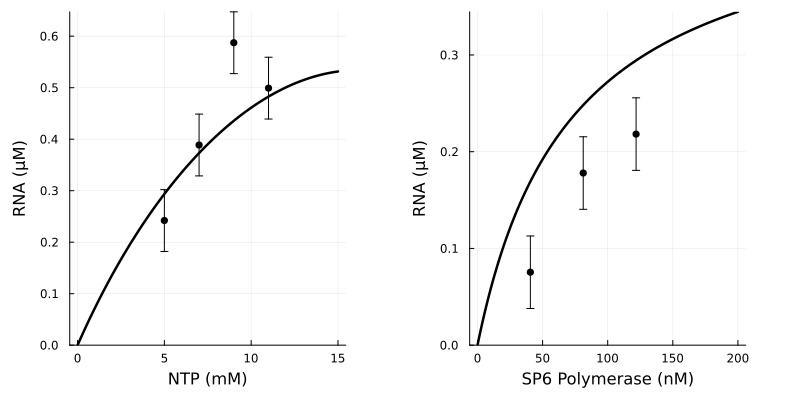

In [6]:
plt1 = plotDatabyNTP(SP6immobilizedfittingmodel,SP6immobilizedfittedparams,SP6immobilizedcovariancemat, false, color = :black, OAccounterion = false)
plt2 = plotDatabyPolymerase(SP6immobilizedfittingmodel,SP6immobilizedfittedparams,SP6immobilizedcovariancemat, false, color = :black, OAccounterion = false)
plt = plot(plt1,plt2, size = (800,400),leftmargin = 5mm, bottommargin = 5mm)
savefig(plt,"../figures/SP6IPFRfitting.png")
plt

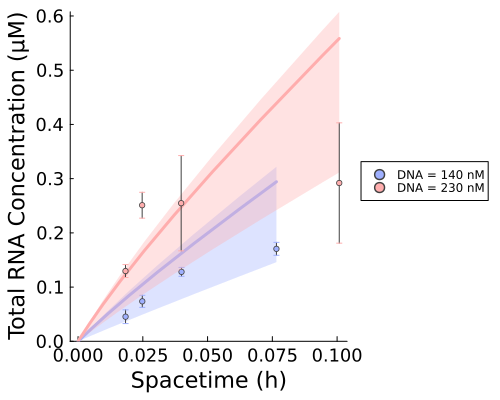

In [8]:
immobilizedvalidationfilename = "../data/external/mccalla/mccalla10.csv"
labels = ["DNA = 140 nM", "DNA = 230 nM"]
plt = plotfromcsv(SP6immobilizedfittingmodel,SP6immobilizedfittedparamslist,SP6immobilizedcovariancemat,immobilizedvalidationfilename, labels = labels, range = 8:9,dataerrorbars = true, plotsize = (500,400), multiplot = false,maximumyield = false,immobilized = true)
plot!(plt,xlabel = "Spacetime (h)")
savefig(plt,"../figures/SP6IPFRvalidation.png")
plt

In [9]:
#Calculating relative Polymerase concentration factor
SP6immobilizedparams = fullparameterset(SP6immobilizedfittingmodel,SP6immobilizedfittedparamslist)
k_e = SP6immobilizedparams.k_e
k_i = SP6immobilizedparams.k_i
k_on = SP6immobilizedparams.k_on
K_md = (SP6immobilizedparams.k_i+SP6immobilizedparams.k_off/SP6immobilizedparams.k_on)
El = k_e/(1776*k_i)
phi = (k_i*1776/(k_e))*(600/80)*(80/(80+K_md))

22.549262347560273

In [10]:
7.5*(1+1/El)/(1)

243.22313816180971

In [11]:
K_md/81.2

9.313986405964515

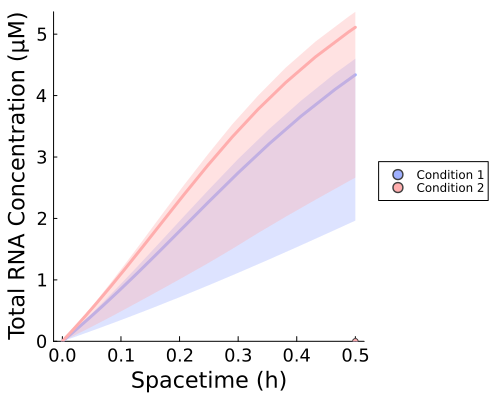

In [12]:
#Predictions for Spacetime
speculativefilename = "../data/external/mccalla/mccalla_speculativereactordesign.csv"
plt = plotfromcsv(SP6immobilizedfittingmodel,SP6immobilizedfittedparamslist,SP6immobilizedcovariancemat,speculativefilename, range = 1:2,dataerrorbars = true, plotsize = (500,400), multiplot = false,maximumyield = false,immobilized = true)
plot!(plt,xlabel = "Spacetime (h)")

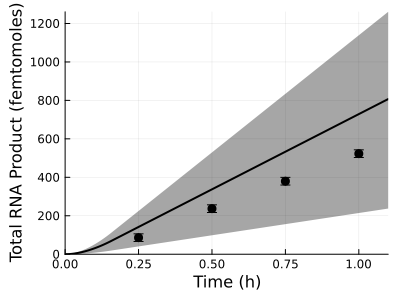

In [13]:
s = plotintegralIPFR(SP6immobilizedfittingmodel,SP6immobilizedfittedparamslist,SP6immobilizedcovariancemat, mcuncertainty = true, nmc = 20)
savefig(s,"../figures/SP6dynamic.png")
s

In [92]:
Ra = k_i/(605*k_on)

0.0002706517708683962

In [77]:
Da_P = 5*1e-21*(k_on*1e9/3600)*1e15/(43)

6.589147286821705

In [99]:
Da_E = (25*k_e/3600)/(1776*43)

0.0030489184078083226

In [104]:
v_front = 19.8e-3*(81.2+K_md)*10^(-9)*3.7e-10/((7.0e-6)*(2.6e-9*(1+El)))

3.491968909923764e-5

In [85]:
(19.8e-3/v_front)/60

9.450255959100293

In [275]:
1e9*0.025/(2117*607.4)

19.442153294690627